In [30]:
import pandas as pd
import yfinance as yf
import datetime as dt
from datetime import datetime

In [31]:
start_date=datetime.now()-pd.DateOffset(months=3)
end_date=datetime.now()

In [32]:
tickers=['AAPL','MSFT','NFLX','GOOG']

In [33]:
df_list=[]

In [34]:
for ticker in tickers:
    data=yf.download(ticker,start=start_date,end=end_date)
    df_list.append(data)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [35]:
df=pd.concat(df_list,keys=tickers,names=['Tickers','Date'])
print(df.head)

<bound method NDFrame.head of                           Open        High         Low       Close  \
Tickers Date                                                         
AAPL    2024-10-07  224.500000  225.690002  221.330002  221.690002   
        2024-10-08  224.300003  225.979996  223.250000  225.770004   
        2024-10-09  225.229996  229.750000  224.830002  229.539993   
        2024-10-10  227.779999  229.500000  227.169998  229.039993   
        2024-10-11  229.300003  229.410004  227.339996  227.550003   
...                        ...         ...         ...         ...   
GOOG    2024-12-27  196.470001  196.800003  191.972000  194.039993   
        2024-12-30  190.865005  193.779999  190.360001  192.690002   
        2024-12-31  192.445007  193.250000  189.580002  190.440002   
        2025-01-02  191.485001  193.199997  188.710007  190.630005   
        2025-01-03  192.725006  194.500000  191.350006  193.130005   

                     Adj Close    Volume  
Tickers Date    

In [36]:
df=df.reset_index()
print(df.head)

<bound method NDFrame.head of     Tickers       Date        Open        High         Low       Close  \
0      AAPL 2024-10-07  224.500000  225.690002  221.330002  221.690002   
1      AAPL 2024-10-08  224.300003  225.979996  223.250000  225.770004   
2      AAPL 2024-10-09  225.229996  229.750000  224.830002  229.539993   
3      AAPL 2024-10-10  227.779999  229.500000  227.169998  229.039993   
4      AAPL 2024-10-11  229.300003  229.410004  227.339996  227.550003   
..      ...        ...         ...         ...         ...         ...   
243    GOOG 2024-12-27  196.470001  196.800003  191.972000  194.039993   
244    GOOG 2024-12-30  190.865005  193.779999  190.360001  192.690002   
245    GOOG 2024-12-31  192.445007  193.250000  189.580002  190.440002   
246    GOOG 2025-01-02  191.485001  193.199997  188.710007  190.630005   
247    GOOG 2025-01-03  192.725006  194.500000  191.350006  193.130005   

      Adj Close    Volume  
0    221.446365  39505400  
1    225.521881  31855700

In [37]:
#Now let’s have a look at the performance in the stock market of all the companies
import plotly.express as px
fig = px.line(df, x='Date', 
              y='Close', 
              color='Tickers', 
              title="Stock Market Performance for Apple,Microsoft,Netflix and Google the Last 3 Months")
fig.show()

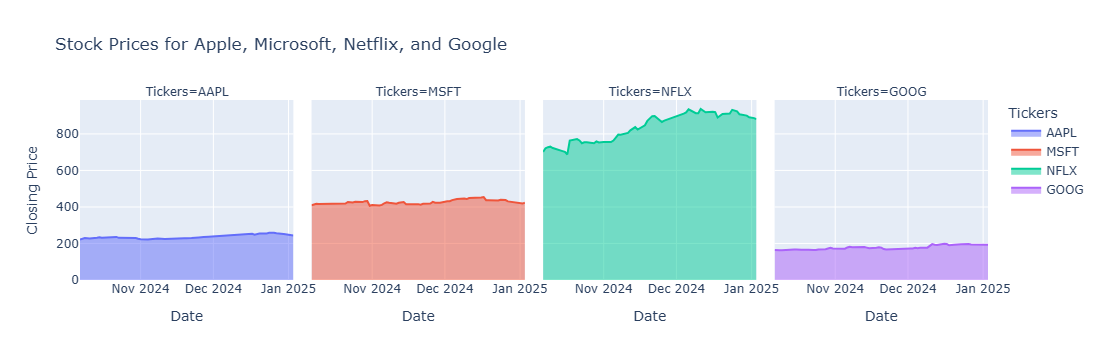

In [38]:
#Now let’s look at the faceted area chart, which makes it easy to compare the performance of different companies and 
#identify similarities or differences in their stock price movements
fig=px.area(df,x='Date',y='Close', color='Tickers',
           facet_col='Tickers',labels={'Date':'Date','Close':'Closing Price','Ticker':'Company'},
            title='Stock Prices for Apple, Microsoft, Netflix, and Google'
           )
fig.show()

In [39]:
#Now let’s analyze moving averages, which provide a useful way to identify trends and patterns in each company’s stock
#price movements over a period of time:
df['AU10'] = df.groupby('Tickers')['Close'].rolling(window=10).mean().reset_index(0, drop=True)
df['AU20'] = df.groupby('Tickers')['Close'].rolling(window=20).mean().reset_index(0, drop=True)

for ticker, group in df.groupby('Tickers'):
    print(f'Moving Averages for {ticker}')
    print(group[['AU10', 'AU20']])

Moving Averages for AAPL
          AU10        AU20
0          NaN         NaN
1          NaN         NaN
2          NaN         NaN
3          NaN         NaN
4          NaN         NaN
..         ...         ...
57  253.306000  248.524500
58  253.712999  249.267999
59  253.650999  249.809499
60  252.688000  249.869500
61  252.219000  249.887000

[62 rows x 2 columns]
Moving Averages for GOOG
           AU10        AU20
186         NaN         NaN
187         NaN         NaN
188         NaN         NaN
189         NaN         NaN
190         NaN         NaN
..          ...         ...
243  194.417001  187.076002
244  194.548001  188.186002
245  193.776001  189.059002
246  193.127002  189.939502
247  193.425003  190.791502

[62 rows x 2 columns]
Moving Averages for MSFT
           AU10        AU20
62          NaN         NaN
63          NaN         NaN
64          NaN         NaN
65          NaN         NaN
66          NaN         NaN
..          ...         ...
119  440.755997  440.23

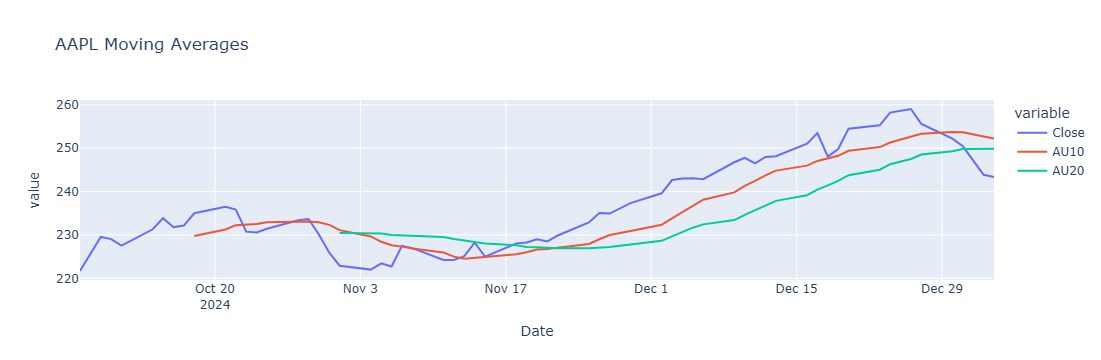

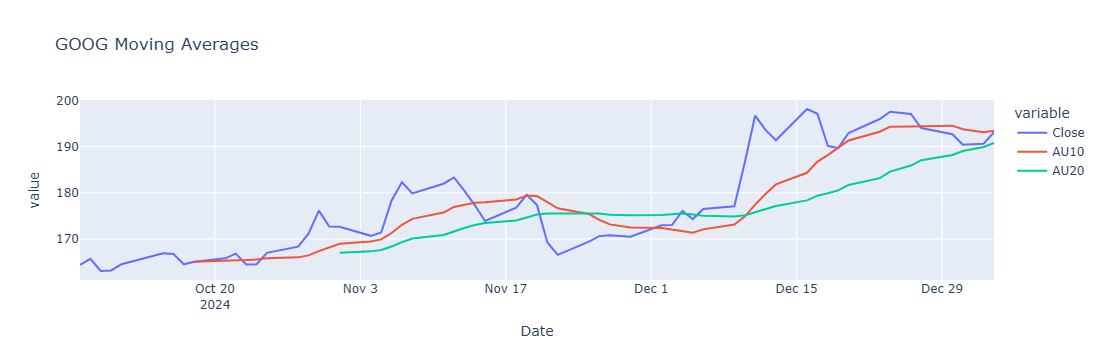

In [40]:
#Now here’s how to visualize the moving averages of all companies:
for ticker, group in df.groupby('Tickers'):
    fig = px.line(group, x='Date', y=['Close', 'AU10', 'AU20'], 
                  title=f"{ticker} Moving Averages")
    fig.show()

In [41]:
#Let us now analyze the volatility of all companies. Volatility is a measure of how much and how often the 
#stock price or market fluctuates over a given period of time. 
#Here’s how to visualize the volatility of all companies
df['Volatility'] = df.groupby('Tickers')['Close'].pct_change().rolling(window=10).std().reset_index(0, drop=True)
fig = px.line(df, x='Date', y='Volatility', 
              color='Tickers', 
              title='Volatility of All Companies')
fig.show()

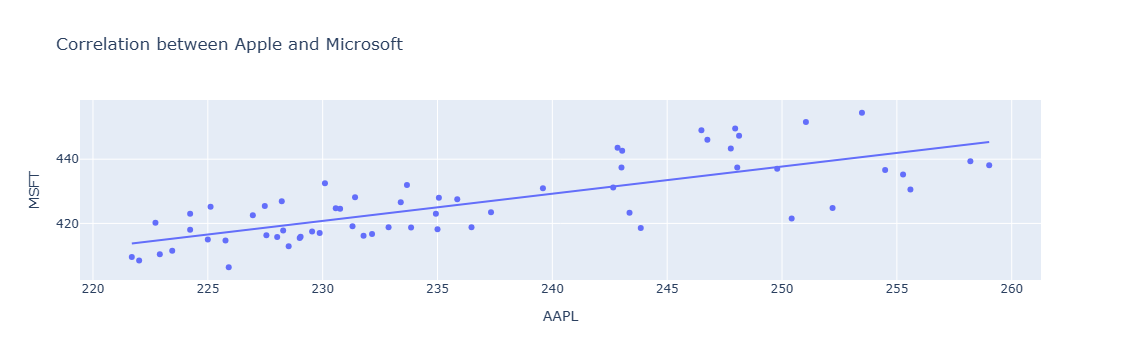

In [42]:
#Now let’s analyze the correlation between the stock prices of Apple and Microsoft:
# create a DataFrame with the stock prices of Apple and Microsoft
apple = df.loc[df['Tickers'] == 'AAPL', ['Date', 'Close']].rename(columns={'Close': 'AAPL'})
microsoft = df.loc[df['Tickers'] == 'MSFT', ['Date', 'Close']].rename(columns={'Close': 'MSFT'})
df_corr = pd.merge(apple, microsoft, on='Date')

# create a scatter plot to visualize the correlation
fig = px.scatter(df_corr, x='AAPL', y='MSFT', 
                 trendline='ols', 
                 title='Correlation between Apple and Microsoft')
fig.show()